# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [308]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [309]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [310]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [311]:
# Write your code here to read the data

data = pd.read_csv('/content/drive/MyDrive/PG AIML/Module1_Assignment/foodhub_order.csv')
# copying data to another variable to avoid any changes to original data
df = data.copy()

In [312]:
# Write your code here to view the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [313]:
# Write your code here
df.shape

(1898, 9)

#### Observations:
The dataset has 1898 rows and 9 columns.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [314]:
# Write your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

* All the columns has 1898 observations which is the total rows in the dataset indicating there may not be missing values. Further confirmation required.
* The datatypes of each column is  
    1.   order_id - Unique identifier for each order (Integer)
    2.   customer_id - Unique identifier for each customer (Integer)
    3.   restaurant_name -	Name of the restaurant (Object)
    4.   cuisine_type -	Cuisine category (Object)
    5.   cost_of_the_order - Cost in USD (Float)
    6.   day_of_the_week - Either "Weekday" or "Weekend" (Object)
    7.   rating -	Customer rating (Object)
    8.   food_preparation_time - Time in minutes (Integer)
    9.   delivery_time -	Time in minutes (Integer)

*   Customer rating is given in Object type, need to check further whether needs to be changed to numerical values (Int)




















### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [315]:
# Write your code here
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations:


*   There are no missing values in the data.



### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [316]:
# Write your code here
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:
1. The order_id has a range from min 1476547 to max 1478444 which means 1898 total values indicating that order_id is generated sequentially and probably auto-generated. Mean is 1477496.
2. customer_id has a wide range from 1311 to 405334 with a big standard deviation of approximately 113698. This implies, it is non sequential and used the same 'id' for repeating customers. It may also be due to outliers. Further investigation is required. Mean is 171168.5.
3. cost_of_the_order ranges from 4.47 to 35.41 dollars. 75% of the orders are below 22.30 dollars. Orders above 30 dollars maybe outliers and further investigation is required. Mean is 16.49.
4. food_preperation_time - average time is approximately 27.4 mins ranging from  20-35 mins. Mean is 27.37.
5. delivery_time takes from 15 mins to 33 mins. Further investigation needed to find the factors affecting delivery time. Mean is 24.16.

### **Question 5:** How many orders are not rated? [1 mark]

In [317]:
# Write the code here

df['rating'].value_counts()



,rating
Not given,736
5,588
4,386
3,188


#### Observations:

We can observe that the number of orders not rated (Not given) is equal to 736.

We can also use `df[df['rating']=='Not given'].shape[0]` to find the number of orders not rated.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [318]:
# Write the code here
#Checking to see dataset has duplicate values
df.duplicated().sum()

0

In [319]:
#Analysing the Order id by checking for number of unique values
df['order_id'].nunique()

1898

#### Observation
Since there are 1898 unique order ids, there are no duplicate ids since total no of rows = 1898.

In [320]:
#Analysing the Customer id by checking for number of unique values
df['customer_id'].nunique()

1200

In [321]:
#Number of values in each unique customre_id
df['customer_id'].value_counts()

,customer_id
52832,13
47440,10
83287,9
250494,8
259341,7
...,...
385426,1
254913,1
289597,1
74412,1


#### Observation
The customer with id 52832 ordered food the most number of times from the app (13 times) closely followed by customer 47440.

In [322]:
#Analysing the unique restaurant names (categorical)
df['restaurant_name'].nunique()

178

#### Observation

There are 178 unique restaurants from which orders are placed.

In [323]:
#Analysing the unique cuisine types (categorical)
df['cuisine_type'].unique()

array(['Korean', 'Japanese', 'Mexican', 'American', 'Indian', 'Italian',
       'Mediterranean', 'Chinese', 'Middle Eastern', 'Thai', 'Southern',
       'French', 'Spanish', 'Vietnamese'], dtype=object)

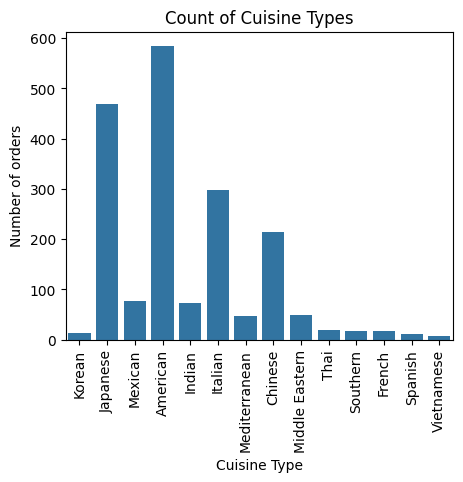

In [324]:
#There are 14 unique cuisine types. Plotting a countplot
plt.figure(figsize=(5,4))
sns.countplot(data=df, x='cuisine_type')
plt.title('Count of Cuisine Types')
plt.xlabel('Cuisine Type')
plt.ylabel('Number of orders')
plt.xticks(rotation=90)
plt.show()

#### Observations
 * There are a total of 14 unique cuisines available.
 * The most popular cuisines are American, followed by Japanese and Italian based on number of orders.
 * The least ordered cuisine is Vietnamese.

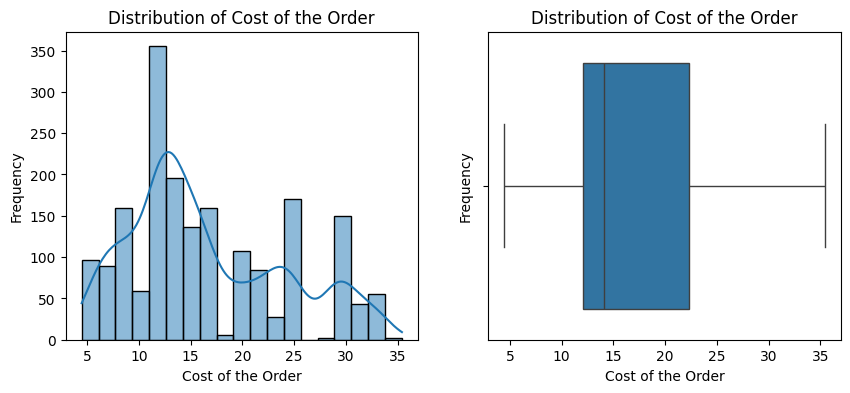

In [325]:
# Analysing cost_of_the_order (numerical)
#Histogram
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(data=df, x='cost_of_the_order', kde=True)
plt.title('Distribution of Cost of the Order')
plt.xlabel('Cost of the Order')
plt.ylabel('Frequency')

#Boxplot
plt.subplot(1,2,2)
sns.boxplot(data=df, x='cost_of_the_order')
plt.title('Distribution of Cost of the Order')
plt.xlabel('Cost of the Order')
plt.ylabel('Frequency')
plt.show()

#### Observations

Histogram shows a right skewed distribution. Maximum orders has a cost between 10 and 20 dollars.

Boxplot has no outliers. But there are a few high cost orders.

In [326]:
# Uniques values in day of the week
df['day_of_the_week'].unique()

array(['Weekend', 'Weekday'], dtype=object)

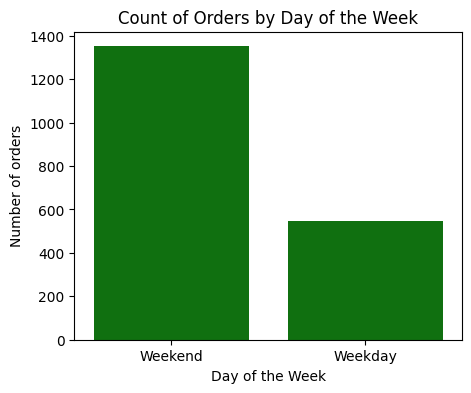

In [327]:
#Analysing day_of_the_week (Categorical)
plt.figure(figsize=(5,4))
sns.countplot(data=df, x='day_of_the_week', color = 'green')
plt.title('Count of Orders by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of orders')
plt.show()


#### Observations
Orders are higher on weekend compared to weekdays.


In [328]:
# Uniques values in rating
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

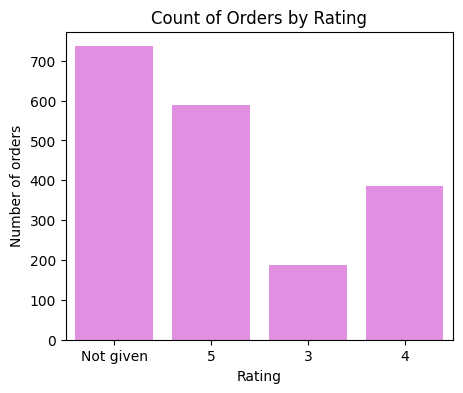

In [329]:
#Analysing rating (Categorical)
plt.figure(figsize=(5,4))
sns.countplot(data=df, x='rating', color = 'violet')
plt.title('Count of Orders by Rating')
plt.xlabel('Rating')
plt.ylabel('Number of orders')
plt.show()

In [330]:
#Finding % of unique categories in rating
df['rating'].value_counts(normalize=True)*100

,rating
Not given,38.777661
5,30.979979
4,20.337197
3,9.905163


#### Observation

Some entries have 'Not given' as rating. These can be considered as not missing values since customers chose to gave no rating. So assuming these are not missing values, most ratings are around 4 and 5 with 5 having more number of orders. 'Not given' accounts for 38.7% of values. It can be assumed that most customers tend to rate high.

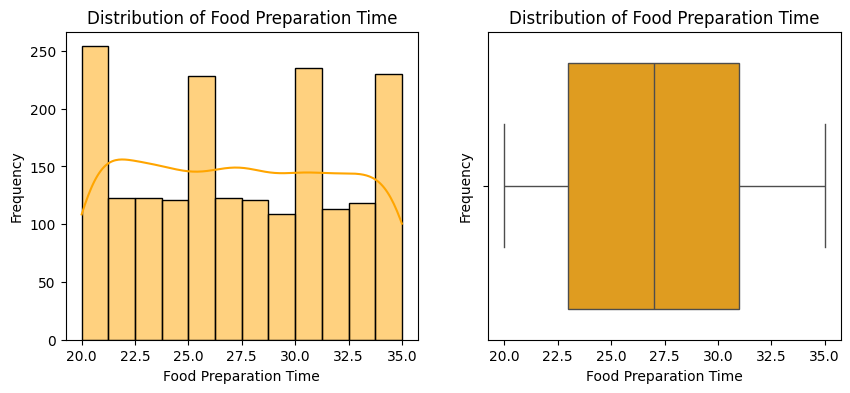

In [331]:
# Analysing food_preperation_time (numerical)
#Histogram
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(data=df, x='food_preparation_time', kde=True,color='orange')
plt.title('Distribution of Food Preparation Time')
plt.xlabel('Food Preparation Time')
plt.ylabel('Frequency')

#Boxplot
plt.subplot(1,2,2)
sns.boxplot(data=df, x='food_preparation_time',color='orange')
plt.title('Distribution of Food Preparation Time')
plt.xlabel('Food Preparation Time')
plt.ylabel('Frequency')
plt.show()

#### Observations

Histogram is uniform between 20 and 35 minutes.
Boxplot is symmetric and there are no outliers.
Food preperation time appears to be consistent across restaurants.

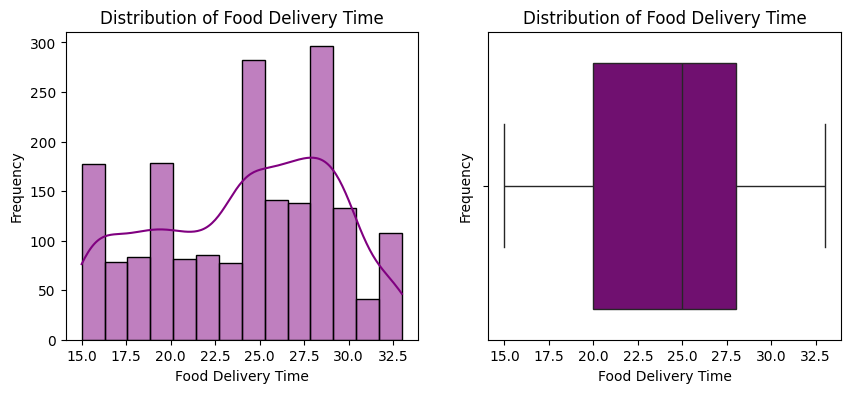

In [332]:
# Analysing delivery_time (numerical)
#Histogram
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(data=df, x='delivery_time', kde=True,color='purple')
plt.title('Distribution of Food Delivery Time')
plt.xlabel('Food Delivery Time')
plt.ylabel('Frequency')

#Boxplot
plt.subplot(1,2,2)
sns.boxplot(data=df, x='delivery_time',color='purple')
plt.title('Distribution of Food Delivery Time')
plt.xlabel('Food Delivery Time')
plt.ylabel('Frequency')
plt.show()

#### Observations

Histogram shows a slightly left skewed distribution. Most deliveries happen between 20-30 mins. Boxplot shows relatively reliable delivery times. The minor outliers may be due to traffic or delivery issues.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [333]:
# Write the code here
#value_counts counts each restaurant and its count. head(5) retrieves the top 5 values
df['restaurant_name'].value_counts().head(5)

,restaurant_name
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations:
Shake Shack has the highest number of orders (219) followed by The Meatball shop and Blue Ribbon Sushi with 132 and 119 respectively. This helps in identifying the restaurants from which customers orders more.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [334]:
# Write the code here
#Filter only weekend orders
weekend_orders = df[df['day_of_the_week']=='Weekend']
#Find popular cuisine from this
weekend_orders['cuisine_type'].value_counts()

,cuisine_type
American,415
Japanese,335
Italian,207
Chinese,163
Mexican,53
Indian,49
Mediterranean,32
Middle Eastern,32
Thai,15
French,13


In [335]:
#FInding most popular cuisine on weedays
#Filter only weekday orders
weekday_orders = df[df['day_of_the_week']=='Weekday']
#Find popular cuisine from this
weekday_orders['cuisine_type'].value_counts()

,cuisine_type
American,169
Japanese,135
Italian,91
Chinese,52
Mexican,24
Indian,24
Middle Eastern,17
Mediterranean,14
Southern,6
French,5


#### Observations:
* Most popular cuisine on weekends is American (415) followed by Japanese (335).
Restaurants offering American food can consider extending hours on weekends.

* Most popular cuisine on weekdays is the same as weekends but with considerably less orders.

In [336]:
#FInding most popular restaurants on weekdays and weekends
#FInding most popular restaurant on weekends
#Filter only weekend orders
weekend_orders_rest = df[df['day_of_the_week']=='Weekend']
#Find popular cuisine from this
weekend_orders_rest['restaurant_name'].value_counts()


,restaurant_name
Shake Shack,145
The Meatball Shop,95
Blue Ribbon Sushi,85
Blue Ribbon Fried Chicken,74
RedFarm Broadway,44
...,...
The MasalaWala,1
Haandi,1
Aurora,1
Crema Restaurante,1


In [337]:
#FInding most popular cuisine on weekdays
#Filter only weekday orders
weekday_orders_rest = df[df['day_of_the_week']=='Weekday']
#Find popular cuisine from this
weekday_orders['restaurant_name'].value_counts()

,restaurant_name
Shake Shack,74
The Meatball Shop,37
Blue Ribbon Sushi,34
Parm,26
Blue Ribbon Fried Chicken,22
...,...
Bukhara Grill,1
Kanoyama,1
Bhatti Indian Grill,1
Philippe Chow,1


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [338]:
# Write the code here
#Calculating orders that cost more than 20 dollats
orders_more_than_20 = df[df['cost_of_the_order']>20]
#total number of orders
total_orders = df.shape[0]
print(f'Total number of orders is {total_orders}')
#number of orders that cost more than 20 dollars
orders_more_than_20_count = orders_more_than_20.shape[0]
print(f'Number of orders that cost more than 20 dollars is {orders_more_than_20_count}')
#percentage of orders that cost more than 20 dollars
print(f'Percentage of orders that cost more than 20 dollars is {round((orders_more_than_20_count/total_orders)*100,2)}%')

Total number of orders is 1898
Number of orders that cost more than 20 dollars is 555
Percentage of orders that cost more than 20 dollars is 29.24%


#### Observations:
29.24% of orders cost more than 20 dollars.
Restaurants can target the customers on higher price range with promotions or deals.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [339]:
# Write the code here
#Calculating mean delivery time
mean_delivery_time = df['delivery_time'].mean()
print(f'Mean delivery time is {round(mean_delivery_time,2)} minutes')

Mean delivery time is 24.16 minutes


#### Observations:
Mean delivery time is 24.16 minutes. That is, on average delivery person delivers within 25 mins.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [340]:
# Write the code here
#Finding the 3 most frequent customers by number of orders
top_3_customers = df['customer_id'].value_counts().head(3)
print(top_3_customers)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64


#### Observations:
The top 3 customer placed 9-13 orders each. Awarding these frequent customers with discounts or vouchers can encourage them to continue.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


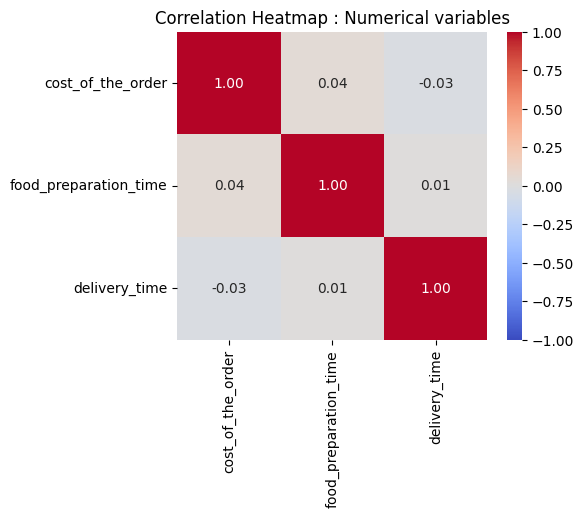

In [341]:
# Write the code here
#Using heatmap to visualise correlation among numerical values (cost_of_the_order,food_preperation_time,delivery_time)
col_list = ['cost_of_the_order','food_preparation_time','delivery_time']
plt.figure(figsize=(5,4))
plt.title('Correlation Heatmap : Numerical variables')
sns.heatmap(df[col_list].corr(),annot=True,vmin=-1,vmax=1,fmt=".2f",cmap='coolwarm')
plt.show()

#### Observation
* Weak correlation among the numeric variables.

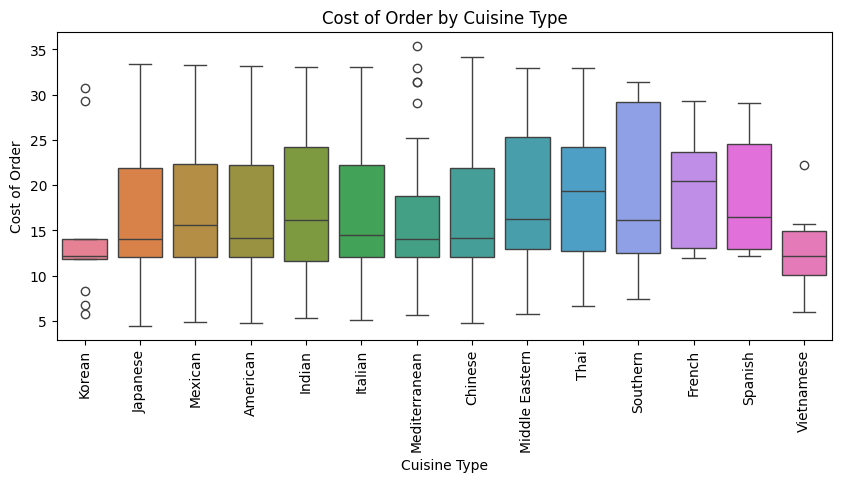

In [342]:
# Analysing Cost of the order Vs Cuisine type
plt.figure(figsize=(10,4))
plt.title('Cost of Order by Cuisine Type')
sns.boxplot(data=df, x='cuisine_type', y='cost_of_the_order',hue='cuisine_type')
plt.xticks(rotation=90)
plt.xlabel('Cuisine Type')
plt.ylabel('Cost of Order')
plt.show()

#### Observations
* Southern cuisine seems to be expensive where more than 50% of the orders costing more than 15 dollars and 25% costing more than 30 dollars. It is followed by middle eastern and Indian with 50% of orders costing more than 15 dollars but with a maximum cost less than sothern cuisine.
* Korean and Vietnamese seems more affordable since their median value falls between 10-15 dollars.
* For french cuisine, distribution is right skewed. For other cuisines except Vietnamese, Thai, French, distribution is left skewed. Korean is highly left skewed with few outliers which maybe due to combo meals.
* Mediterranean is highly right skewed, also has a few outliers. While most of the orders cost less than 20 dollars, there are  a few that cost as high as 35 dollars.



Text(0.5, 0, 'Day of the Week')

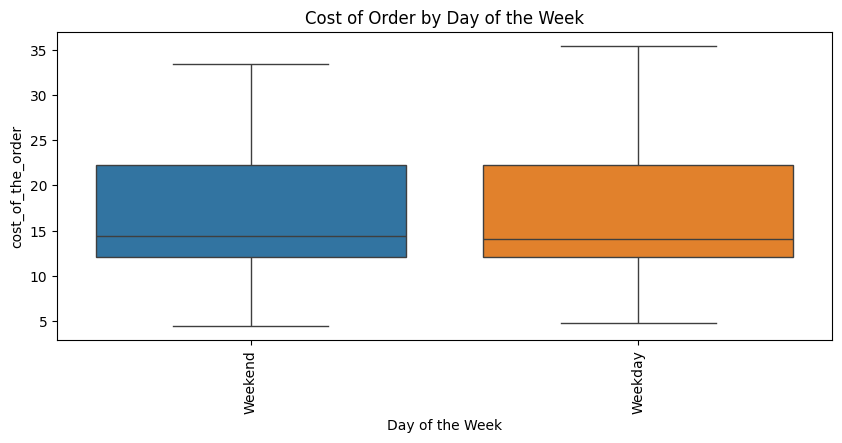

In [343]:
# Analysing Cost of the order Vs Day of the week
plt.figure(figsize=(10,4))
plt.title('Cost of Order by Day of the Week')
sns.boxplot(data=df, x='day_of_the_week', y='cost_of_the_order', hue= 'day_of_the_week')
plt.xticks(rotation=90)
plt.xlabel('Day of the Week')

#### Observations
distirbution appears to be similar during weekdays and weekend.


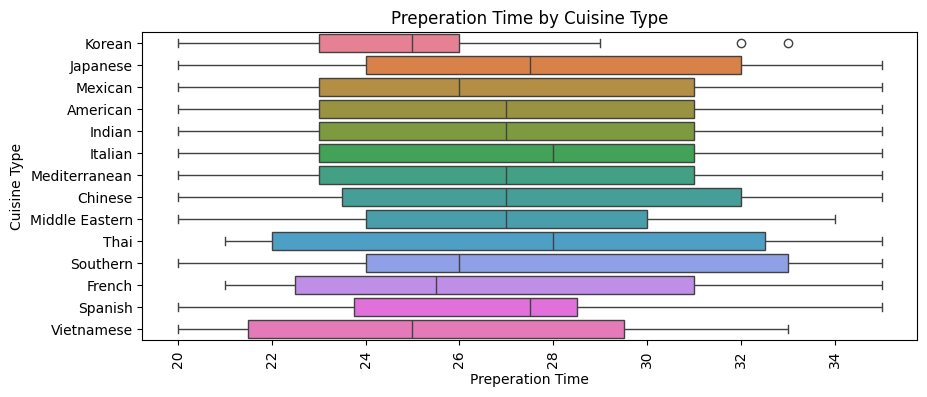

In [344]:
# Analysing cuisine Vs Preperation time
plt.figure(figsize=(10,4))
plt.title('Preperation Time by Cuisine Type')
sns.boxplot(data=df, y='cuisine_type', x='food_preparation_time',hue='cuisine_type')
plt.xticks(rotation=90)
plt.ylabel('Cuisine Type')
plt.xlabel('Preperation Time')
plt.show()

#### Observations
* Japanese, Italian, Thai and Spanish cuisines have higher median values compared to others and more than 50% of the orders will take more than  27 mins to prepare.

* Vietnames has the range from 21 to 29 mins for prep time whereas most of the others except Korean and Spanish has more prep time.

* Korean cuisine has the prep time in a very small range. More than 50% orders for Korean and  Vietnamese can be prepared within 25 mins.

* American, Indian, Mediterranean, Chinese and middle eastern cuisines have similar median prep value.

* Korean cuisines show few outliers in the range of 32 - 34 mins which is high compared to their median prep time. This may be due to secial orders or combos.


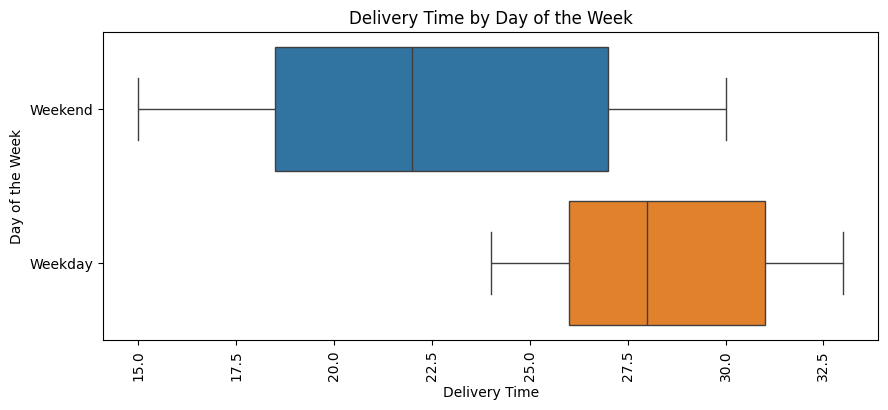

In [345]:
#Analysing day of the week Vs delivery time
plt.figure(figsize=(10,4))
plt.title('Delivery Time by Day of the Week')
sns.boxplot(data=df, y='day_of_the_week', x='delivery_time',hue='day_of_the_week')
plt.xticks(rotation=90)
plt.ylabel('Day of the Week')
plt.xlabel('Delivery Time')
plt.show()

#### Explanation

* Weekday median(28 mins) is higher than weekend (22 mins)
Weekday deliveries takes longer since 50% of the deliveries take more than 28 mins to deliver whereas weekend onlt takes 22 mins.

* Minimum delivery time during weekend takes only  mins whereas weekday takes about 24mins. Max time taken during weekend is 30 mins and for weekdays 33 mins.

* Weekday deliveries have lower variation. delivery seems to be delayed. Weekend deliveries show greater variations, but are faster overall,possibly due to less traffic, higher staffing etc.

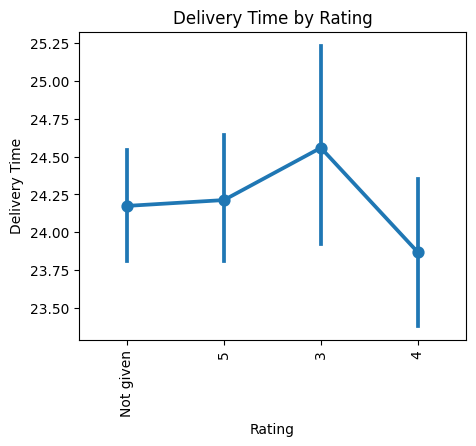

In [346]:
#Analysing Rating Vs delivery time
plt.figure(figsize=(5,4))
plt.title('Delivery Time by Rating')
sns.pointplot(data=df, x='rating', y='delivery_time')
plt.xticks(rotation=90)
plt.xlabel('Rating')
plt.ylabel('Delivery Time')
plt.show()

#### Observations

* Rating 4 has the shortest average delivery time, not 5. Rating 5 has a slightly higher average average delivery time than 4 suggesting delivery time alone does not determine top ratings.
* Higher delivery times spread for rating 3 indicates that delivery time may be a factor contributing to the rating, but is not solely responsible since ratings does not vary significantly with average delivery time. Other factors such as food quality etc may be contributing.
* Rating 'Not given' has a shorter spread of delivery time compared to others.

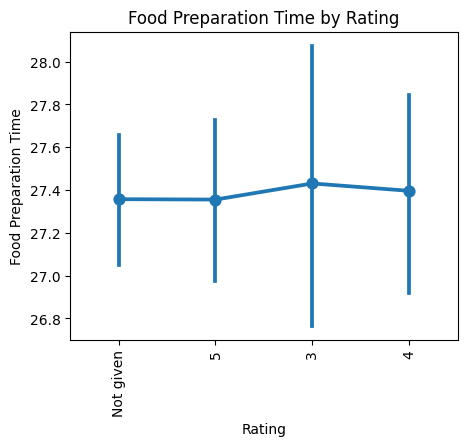

In [347]:
##Analysing Rating Vs Food preperation time
plt.figure(figsize=(5,4))
plt.title('Food Preparation Time by Rating')
sns.pointplot(data=df, x='rating', y='food_preparation_time')
plt.xticks(rotation=90)
plt.xlabel('Rating')
plt.ylabel('Food Preparation Time')
plt.show()


#### Observation

* The average prep time is nearly idetical across all ratings wiht rating 3 slightly higher. Rating  and Not given has similar average. Rating 3 has a wider margin.

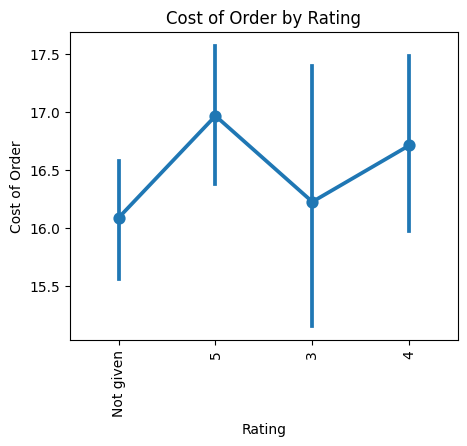

In [348]:
# Analysing rating Vs cost of the order
plt.figure(figsize=(5,4))
plt.title('Cost of Order by Rating')
sns.pointplot(data=df, x='rating', y='cost_of_the_order')
plt.xticks(rotation=90)
plt.xlabel('Rating')
plt.ylabel('Cost of Order')
plt.show()

#### Observations.

* Higher rated orders seems slightly more expensive and unrated orders are the least expensive. Average cost increases gradually from rating 3 to 5.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [349]:
# Write the code here
#Filter the rated restaurants, exclude 'Not given'
df_rated = df[df['rating']!='Not given'].copy()
#Convert rating to int from object
df_rated['rating'] = df_rated['rating'].astype('int')
#Group by restaurants to calculate rating count and average rating
restaurant_rating_count = df_rated.groupby(['restaurant_name'])['rating'].agg(['count','mean']).reset_index()
#Filter for rating count greater than 50 and average rating greater than 4
restaurants_names = restaurant_rating_count[(restaurant_rating_count['count']>50) & (restaurant_rating_count['mean']>4)].sort_values(by='mean',ascending=False).reset_index(drop=True)
#Get restaurant names
#Output
print(restaurants_names)

             restaurant_name  count      mean
0          The Meatball Shop     84  4.511905
1  Blue Ribbon Fried Chicken     64  4.328125
2                Shake Shack    133  4.278195
3          Blue Ribbon Sushi     73  4.219178


In [350]:
# ##
# #Convert rating to int frm object
# df_rated = df[df['rating']!='Not given'].copy()
# df_rated['rating'] = df_rated['rating'].astype('int')
# # Creating a dataframe that contains restaurant names and their rating counts
# df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending=False).reset_index()
# # Get retaurant names with rating count more than
# rest_names = df_rating_count[df_rating_count['rating']>50]['restaurant_name']
# #Filter to get data of restaurants that have rating count more than 50
# df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()
# #Group the restaurant names and calculate mean rating
# df_mean_4_rating = df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending=False).reset_index().dropna()
# #Filter for average rating greater than 4
# df_avg_rating_greater_than_4 = df_mean_4_rating[df_mean_4_rating['rating']>4].sort_values(by='rating',ascending=False)
# df_avg_rating_greater_than_4
# ##

#### Observations:

* The Meatball shop leads with higher number of ratings and highest average 4.51.

* The Shake Shack though has the most ratings, has a slightly lower average rating 4.28.

* These restaurants are high performing and is most likely to benefit from promotions.


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [351]:
# Write the code here
#Function to calculate revenue
def calculate_revenue(x):
  if x>20:
    return x*0.25
  elif x>5:
    return x*0.15
  else:
    return 0
#Apply function to each order to calculate revenue
df['revenue'] = df['cost_of_the_order'].apply(calculate_revenue)

#Calculate total revenue from all orders
total_revenue = df['revenue'].sum()
print(f'Total revenue generated is {round(total_revenue,2)} dollars')



Total revenue generated is 6166.3 dollars


#### Observations:
* A substantial portion of revenue comes likely from orders > 20 dollars where the company earns more per order.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [352]:
# Write the code here
#Adding food prep time and delivery time and storing in a new col called total_time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

#Count orders that took more than 60 mins
orders_more_than_60 = df[df['total_time']>60].shape[0]
#Total number of orders
total_orders = df.shape[0]
#Percentage of orders that took more than 60 mins
percentage_of_orders_more_than_60 = (orders_more_than_60/total_orders)*100
print("Percentage of orders taking more than 60 mins are ", round(percentage_of_orders_more_than_60,2),"%")

Percentage of orders taking more than 60 mins are  10.54 %


#### Observations
* About 10.54% of all orders takes more than 60 mins from placing order to receiving it. These orders may need improvement in preperation or delivery. These long delivery can affect the ratings due to customer dissatifcation.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [353]:
# Write the code here
#Mean delivery time for weekdays
weekday_mean = df[df['day_of_the_week']=='Weekday']['delivery_time'].mean().round(2)
print("Weekday mean delivery time : ", weekday_mean, "minutes")
#Mean delivery time for weekends
weekend_mean = df[df['day_of_the_week']=='Weekend']['delivery_time'].mean().round(2)
print("Weekend mean delivery time : ", weekend_mean, "minutes")

Weekday mean delivery time :  28.34 minutes
Weekend mean delivery time :  22.47 minutes


#### Observations:
* Orders take longer on weekdays (28.34 mins) than on weekends (22.47 mins).
This might be due to traffic, busy work hours or fewer delivery staff on weekdays.

In [354]:
#Top 5 cuisines by average rating
#Filtering Not given ratings and converting rating to integer
df_rating_cleaned_ng = df[df['rating']!='Not given'].copy()
df_rating_cleaned_ng['rating'] = df_rating_cleaned_ng['rating'].astype('int')
#Grouping by cuisine and calculating average rating
df_rating_cleaned_ng.groupby(['cuisine_type'])['rating'].mean().sort_values(ascending=False).head(5)

,rating
cuisine_type,
Spanish,4.833333
Thai,4.666667
Indian,4.540000
Mexican,4.416667
Japanese,4.373626


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:

* Orders are higher on weekends compared to weekdays.
* The top 5 highly rated cuisines based on average ratings are Spanish (4.833333), Thai(4.666667), Indian(4.540000), Mexican(4.416667) and Japanese(4.373626).
* The favourite restaurants during weekdays and weekends on the basis of number of orders are the same, in the order Shake Shack(145), The Meatball Shop(95), Blue Ribbon Sushi(85),Blue Ribbon Fried Chicken (74) and so on.

*   Most popular cuisine on weekends is American (415) followed by Japanese (335) and Italian.
* Most popular cuisine on weekdays is the same as weekends, but with considerably less number of orders.
*   Japanese, Italian, Thai and Spanish cuisines have higher median values compared to others and more than 50% of the orders will take more than 27 mins to prepare.
*  Higher rated orders seems slightly more expensive. That is orders rated 5 stars cost more on average than lower rated ones. It may be due to that fact that customers will give better ratings when they order larger meals.
*  Restaurants like The Meatball shop and Shake Shack has more ratings as well as high average scores
*  Weekend deliveries are faster where it takes about 22 mins, compared to weekdays which takes about 28 mins. Weekday delay might be due to traffic, peak work hours or busy restaurant operations.

### Recommendations:

*  Reward and Promote highly rated Restaurants - Give more visibility to resturants with average rating greater than 4 and more than 50 ratings.
* Most popular cuisines on weekdays and weekends are American, Japanese and Italian. These cuisines can be promoted during weekends (since orders are more on weekends) using special deals or offers.
* Identify orders that took totaltime more than 60 mins and collect feedback. Discounts can be offered to reduce customer satisfaction.
* Add more delivery personnels during weekdays to improve delivery time, especially during peak hours.
* Promote cuisines with faster delivery and higher ratings to boost customer satisfaction.
* Most popular cuisine on weekends is American (415) followed by Japanese (335) on weekends. Restaurants offering American food can consider extending hours on weekends.

---